In [10]:
train_data_path = "/kaggle/input/emotion-detection-fer/train"

In [11]:
import os
classes = []
for category in os.listdir(train_data_path):
    path = [ (train_data_path+"/"+category+"/"+img_path) for img_path in os.listdir(train_data_path+"/"+category)]
    classes.append(category)

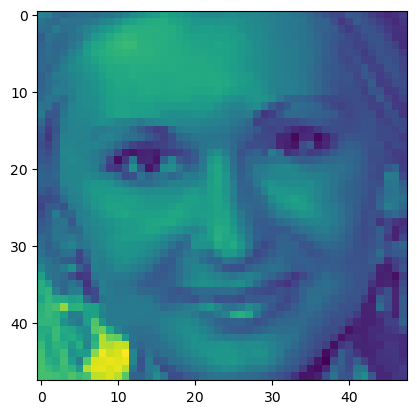

In [12]:
import matplotlib.pyplot as plt
img = plt.imread(path[0])
plt.imshow(img)
plt.show()


In [13]:
print(f"image shape : {img.shape}")

image shape : (48, 48)


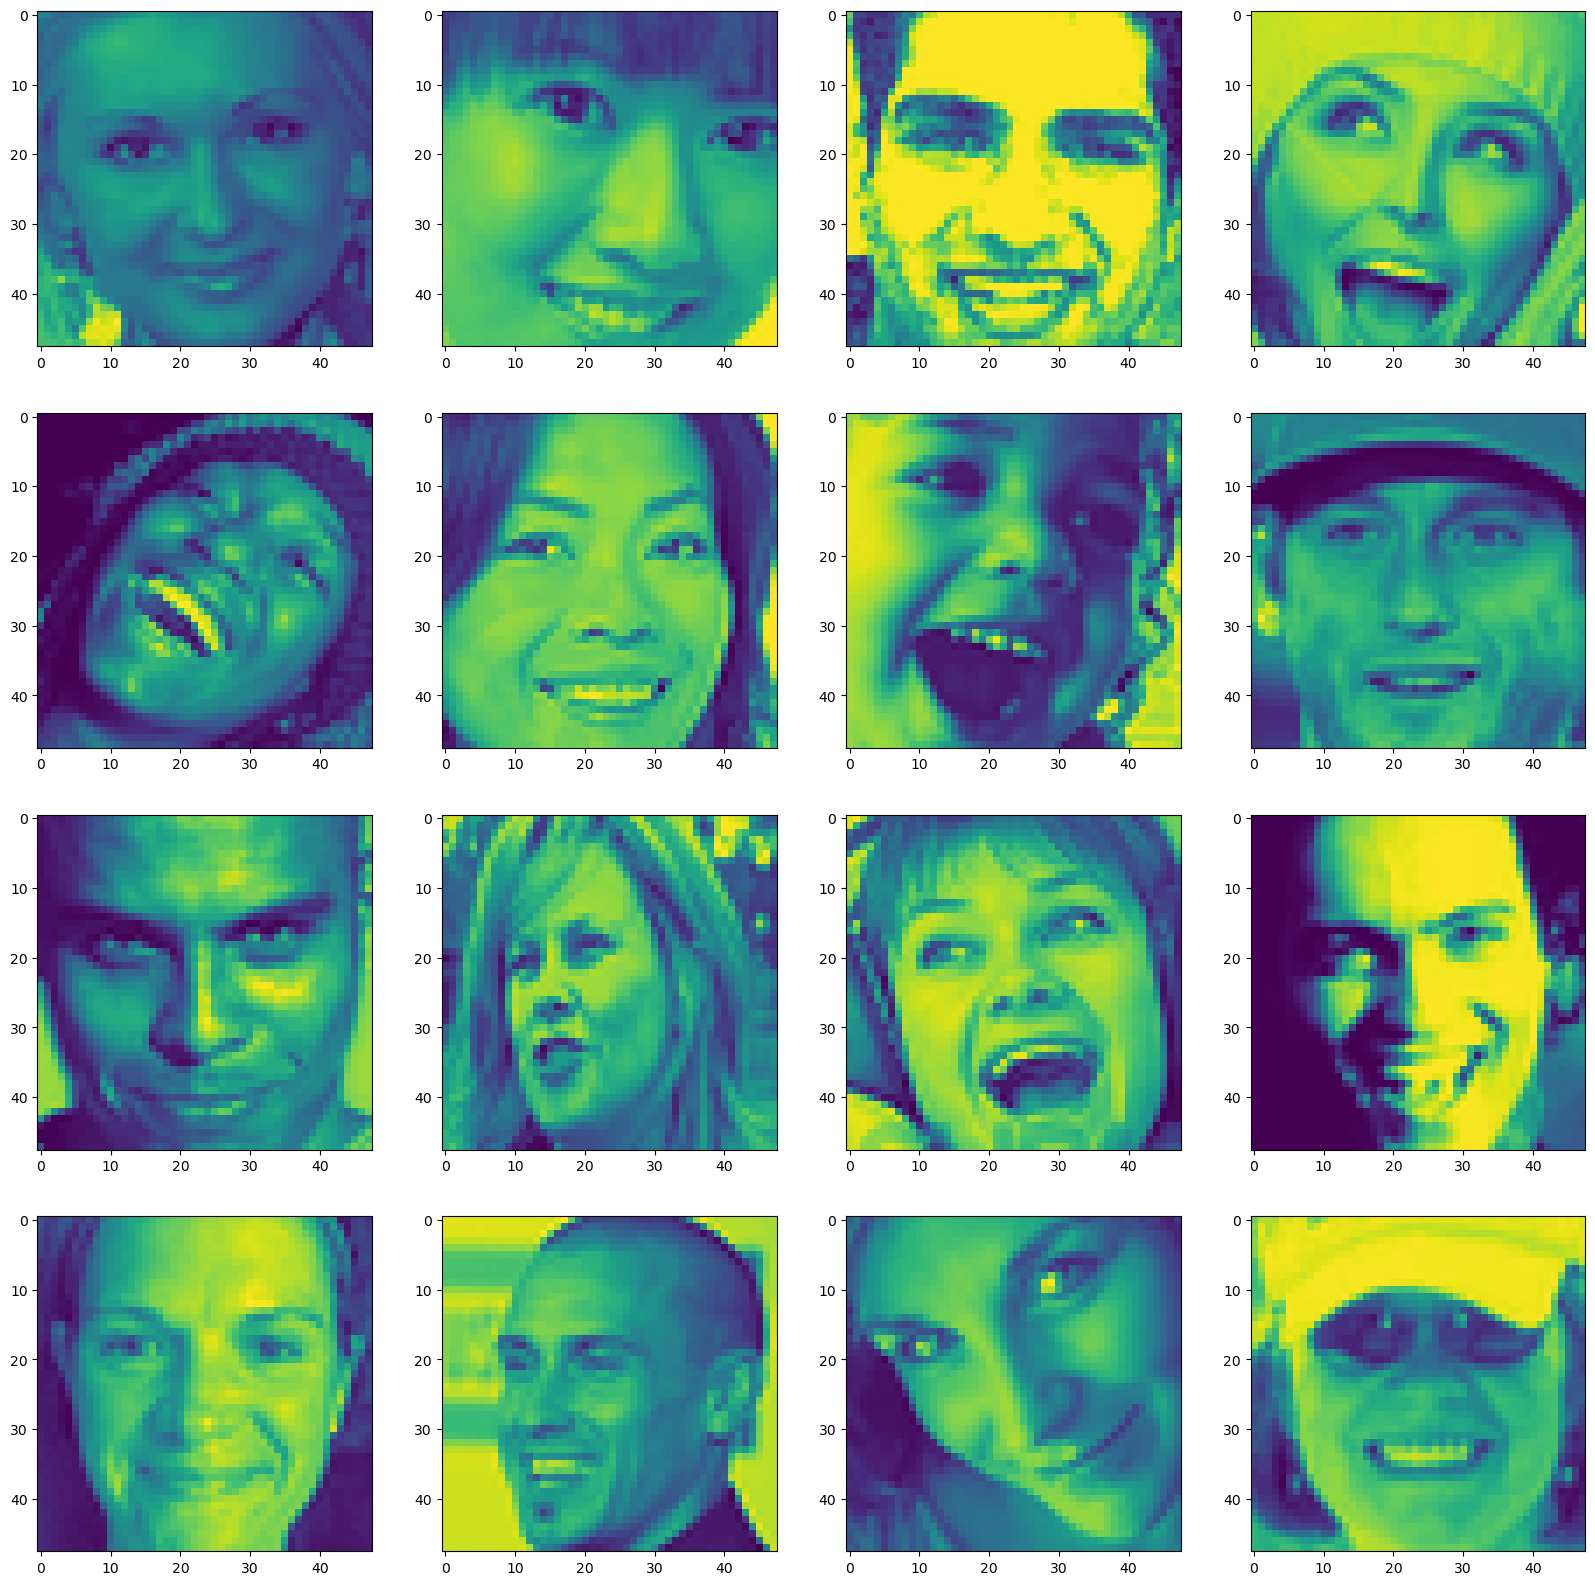

In [14]:
import numpy 
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = plt.imread(path[i])
    plt.imshow(img)
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
train_data = image_dataset_from_directory(train_data_path,batch_size=16,image_size=(48,48))

Found 28709 files belonging to 7 classes.


In [19]:
class_names = train_data.class_names
print(f"No of Classes: {train_data.class_names}")

No of Classes: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [20]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 48, 48, 3)
(16,)


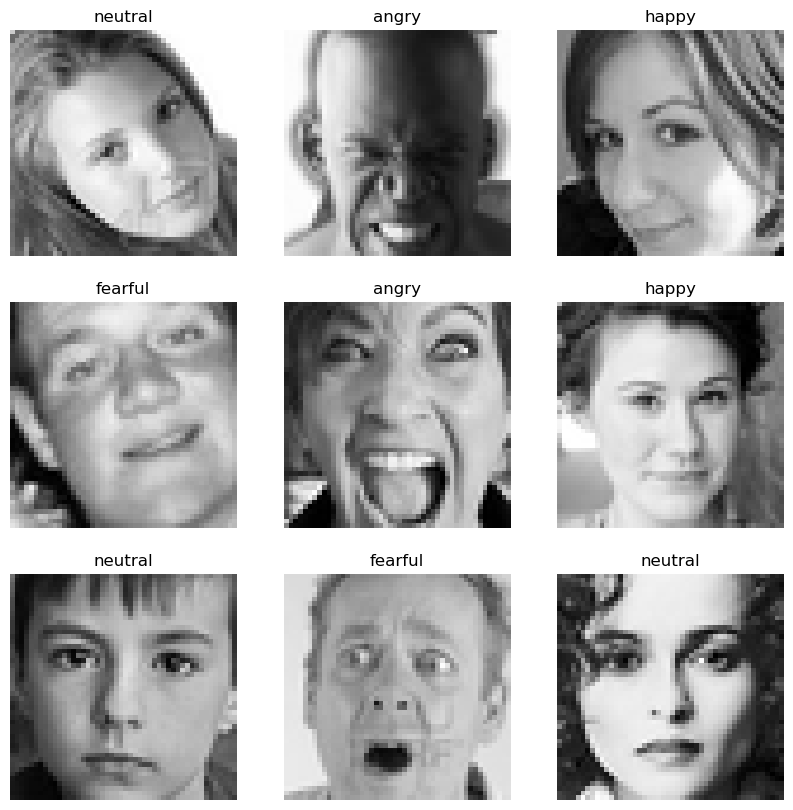

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [25]:
model.fit(train_data,epochs=10)

Epoch 1/10
1795/1795 [==============================] - 98s 49ms/step - loss: 1.6015 - accuracy: 0.3691
Epoch 2/10
1795/1795 [==============================] - 8s 4ms/step - loss: 1.3550 - accuracy: 0.4792
Epoch 3/10
1795/1795 [==============================] - 9s 5ms/step - loss: 1.2484 - accuracy: 0.5238
Epoch 4/10
1795/1795 [==============================] - 8s 5ms/step - loss: 1.1713 - accuracy: 0.5521
Epoch 5/10
1795/1795 [==============================] - 8s 5ms/step - loss: 1.1049 - accuracy: 0.5825
Epoch 6/10
1795/1795 [==============================] - 8s 4ms/step - loss: 1.0419 - accuracy: 0.6084
Epoch 7/10
1795/1795 [==============================] - 9s 5ms/step - loss: 0.9770 - accuracy: 0.6346
Epoch 8/10
1795/1795 [==============================] - 8s 5ms/step - loss: 0.9188 - accuracy: 0.6575
Epoch 9/10
1795/1795 [==============================] - 8s 5ms/step - loss: 0.8635 - accuracy: 0.6795
Epoch 10/10
1795/1795 [==============================] - 8s 5ms/step - loss: 0.8

In [27]:
test_data_path = "/kaggle/input/emotion-detection-fer/test"
test_data = image_dataset_from_directory(test_data_path,batch_size=16,image_size=(48,48))

Found 7178 files belonging to 7 classes.


In [37]:
for image_batch, labels_batch in test_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 48, 48, 3)
(16,)


1/1 [==============================] - 0s 26ms/step


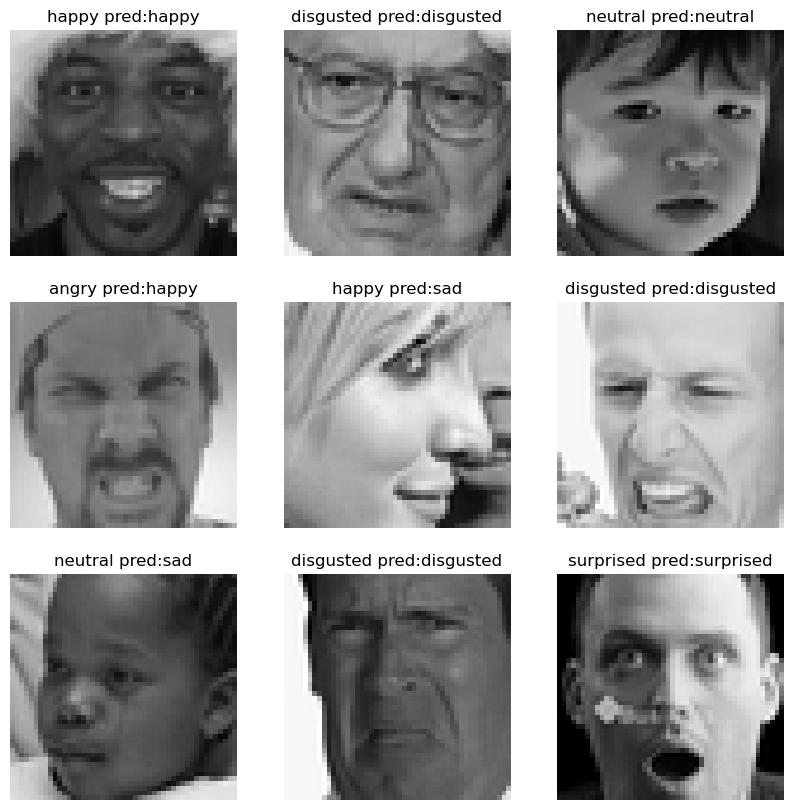

In [78]:
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
        
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = np.expand_dims(images[i],axis=0)
        x = model.predict(img)
        x = classes[x.argmax()]
        
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[ labels[i]]+" pred:"+str(x))
        plt.axis("off")